# iDigBio Maps

## How to Create a Heatmap and Regular Map Using iDigBio's API

In this tutorial, we'll create a simple heatmap and some other maps using the iDigBio API. This will give you the skills necessary to navigate the API for making maps. Heatmaps are just one of the types of maps we can make. 

This tutorial is designed to give a broad overview of the mapping functionality of the iDigBio API.

First, import:

In [1]:
import idigbio
import pandas as pd
from IPython.display import Image
from pathlib import Path

I've copied this text from my last tutorial: 
### Step 4: Accessing the Actual Data

At this point, we can search for whatever information we need. Here are the basics:

Create json data
`api = idigbio.json()
json_output = api.search_records()`

or 

Create a pandas dataframe
`api = idigbio.pandas()
pandas_output = api.search_records()`

[This website](https://github.com/idigbio/idigbio-search-api/wiki) is useful in using this system. 

Here, we will use json.

In [2]:
api_json = idigbio.json() #I modified this line to specify which data type we're using
json_output = api_json.search_records()
#json_output

Now that we have the data, let's make some maps. 

Here, I want to see all the bears in the collections. 

My home institution is UC Berkeley, where our mascot is Oski who is a Golden Bear. Although there are no bears in California anymore, I would like to know more about bears in general. Let's make a heatmap of bears around the world. 

What is a bear? A bear is a large mammal of the genus Ursus. Here are some pictures of bears. 

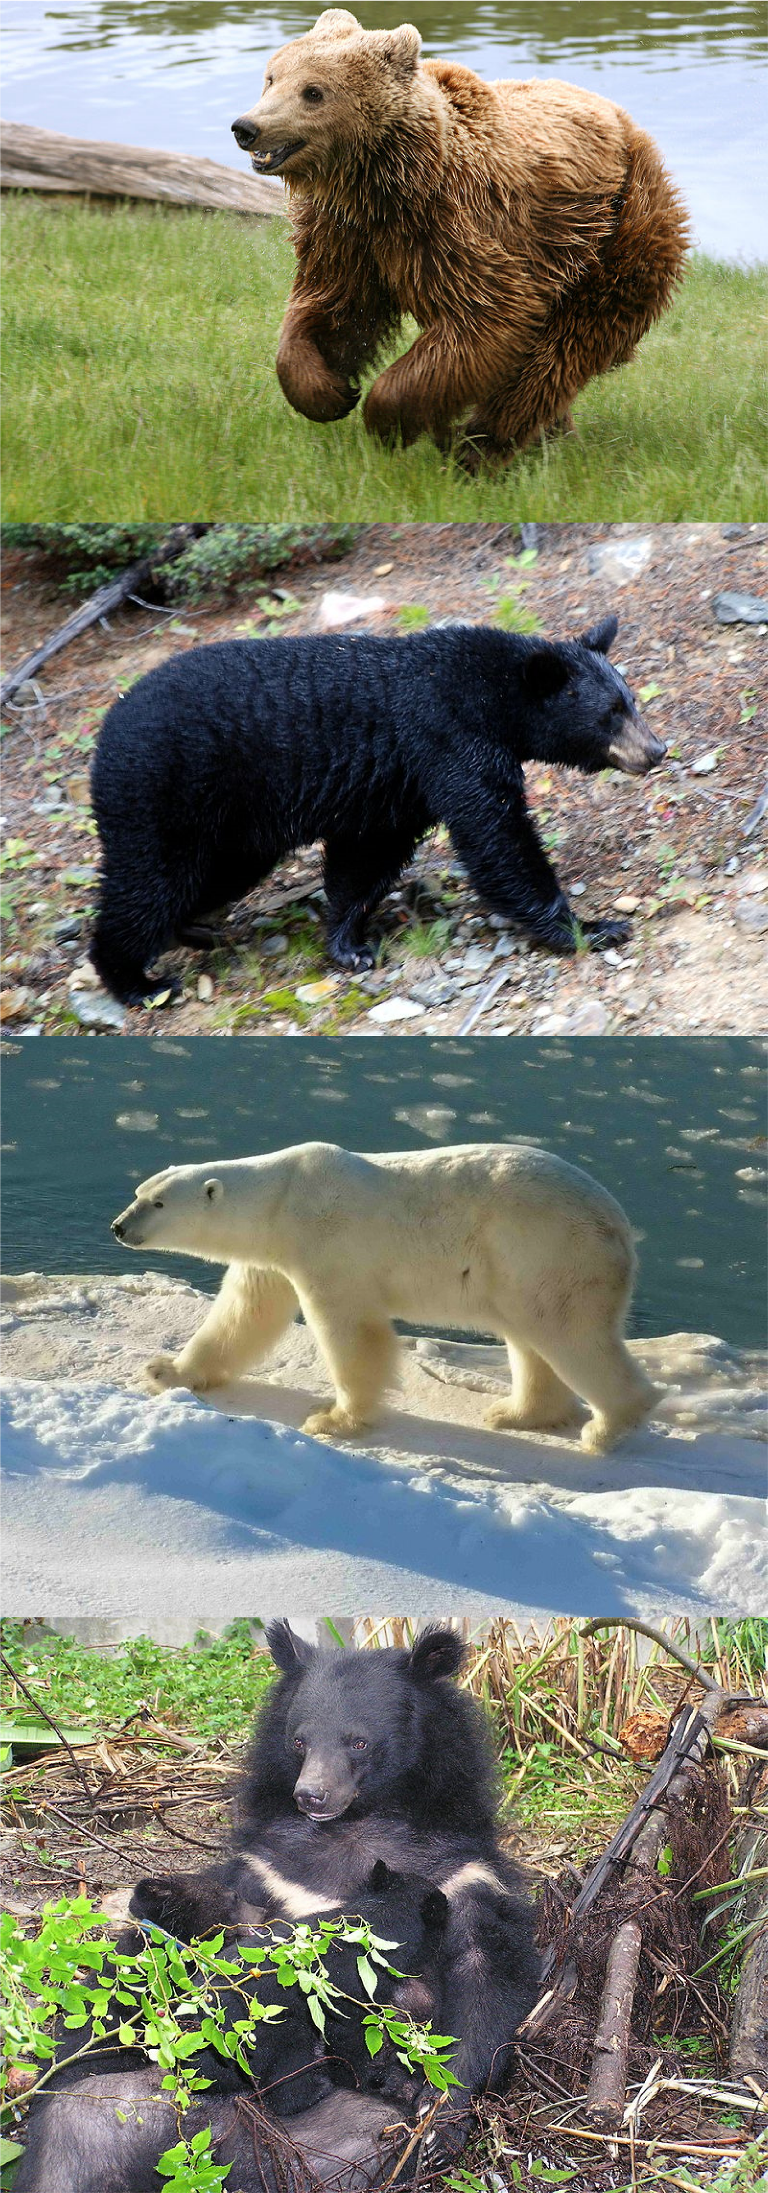

In [4]:
Image(filename = '../images/bears.png')

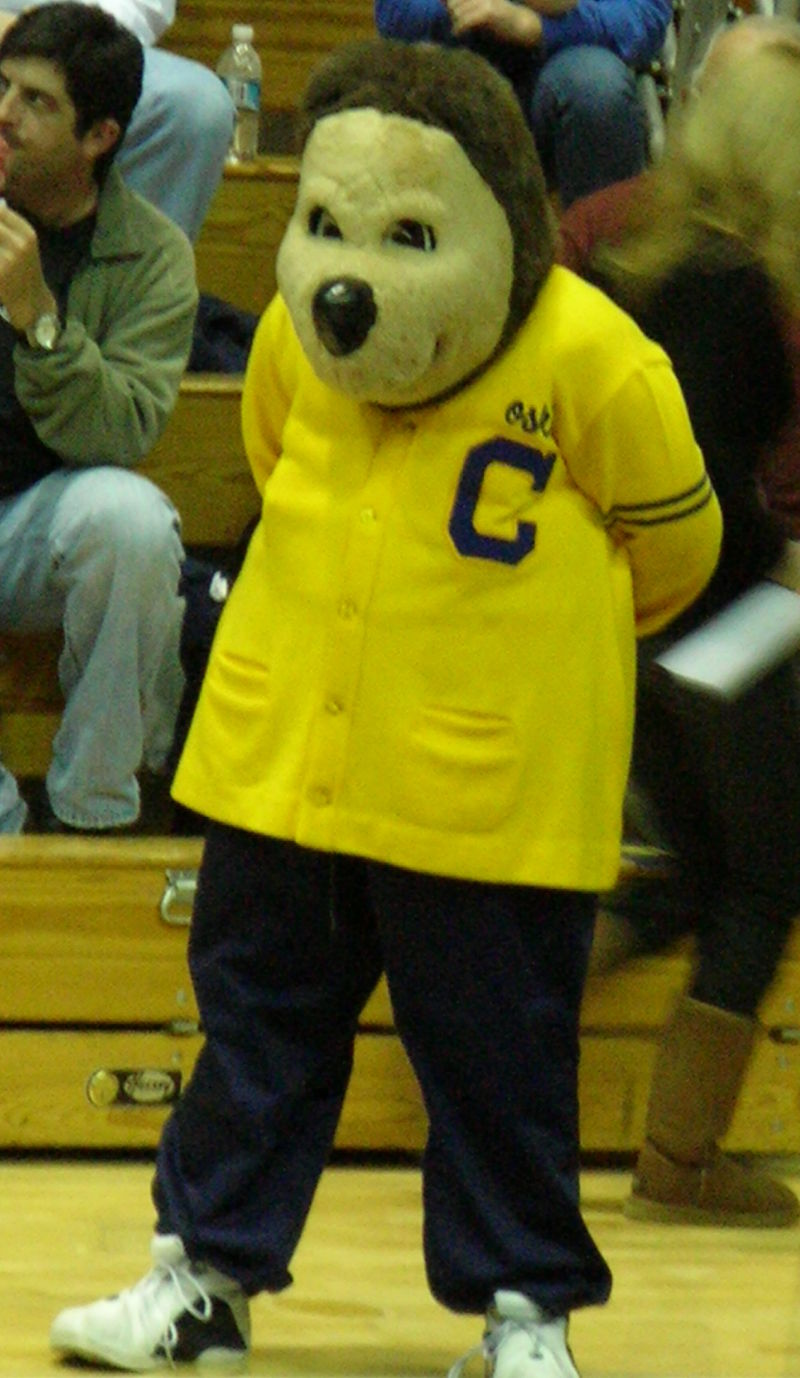

In [3]:
Image(filename = '../images/oski.JPG')

## Making Maps Using the iDigBio API

To make a map, we're going to be using the .create_map functionality built into the iDigBio API. This functionality is described [here](https://github.com/idigbio/idigbio-search-api/wiki#create-map).

Basically, we have to call the json file, use .create_map, and specify any of three parameters:
* rq, which is the search query itself
* style, which allows us to choose a style (the website suggests that the defaults should work fine for most uses)
* type, which is either geohash or points, and gives us either a heatmap or a map with points representing the data

Specify the rq by genus, here ursus. I want a heatmap, so specify t as "geohash". Don't worry if this looks confusing; I've linked websites to help build this code below. 

To view the map, I save it to the same folder my notebook is in and open it with Image. 

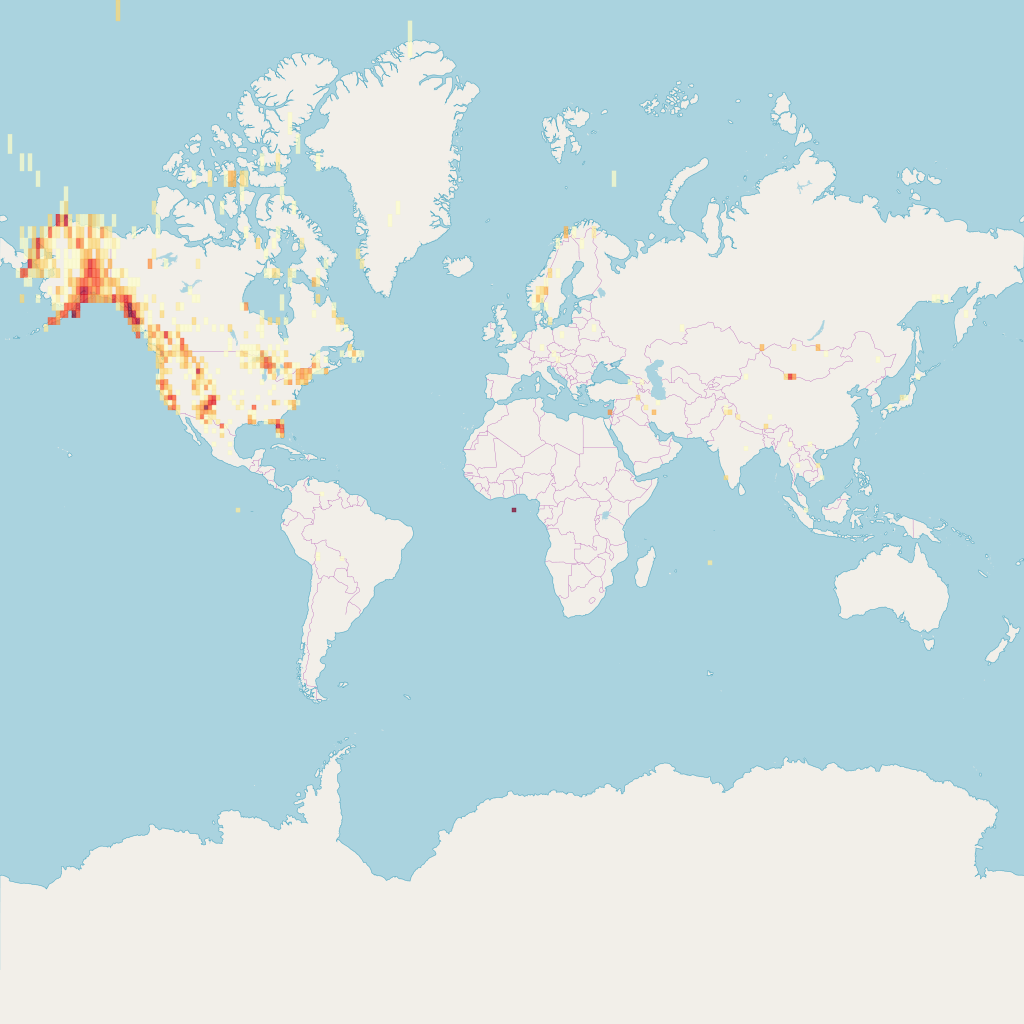

In [4]:
#Create a heatmap of results
m = api_json.create_map(rq={"genus": "ursus"}, t="geohash")
m.save_map_image("../images/bear_geohash", 2)
Image(filename = '../images/bear_geohash.png')

I'm not sure exactly which projection this map is, but I believe it's Mercator. I'm also not sure how to find out; I looked at [this website](https://www.geolounge.com/types-map-projections/) and compared maps. 

Let's zoom in on this map....

To do this, we'll use the bbox functionality of rq (the search query), which we can specify after the genus. The easiest way to use bbox was to set a variable defining 'type,' and 'bottom_right' and 'top_left' (which define the box's location/dimensions)

Then, use this variable inside the rq query under 'geopoint' and voila!

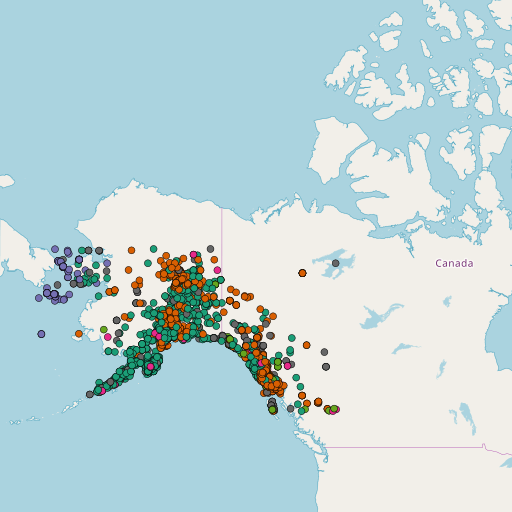

In [6]:
## Takes a few minutes to run
bbox = {"type": "geo_bounding_box", "bottom_right": {"lat": 53, "lon": -120}, "top_left": {"lat": 67, "lon": -176}}
m = api_json.create_map(
    rq={"genus": "ursus", "geopoint": bbox})

m.save_map_image("alaska.png", None, bbox=bbox)
Image(filename = "alaska.png.png")

I used [this website](http://bboxfinder.com/) to find the coordinates for the box. You can make any coordinates you like for whereever you want to zoom into! Due to the differences in projections of the bbox finder and the map, you might want to play around with the coordinates until you get a box that fits. I also don't know what the dot colors mean, and I'm not sure how to find out. I couldn't find anything helpful on the GitHub or in the API information. My best guess would be that it's seperation by institution. 

[This website](https://github.com/idigbio/idigbio-search-api/wiki/Query-Format) is great for building code, it's the API search query formats.  You are able to search:
* if a record exists or not, and if it contains certain values or keywords (see "All fields")
* if a record has certain properties (see "Boolean fields")
* for ranges of numbers, ex: elevation (see "Numeric fields")
* for dates (see "Date fields")
* for geographic areas (see "Geographic point fields")

[This website](https://github.com/idigbio/idigbio-search-api/wiki/Index-Fields) helps you write index queries. You can search MANY fields, including but not limited to:
* catalognumber
* collector
* datecollected
* geopoint
* kingdom, order, phylum, etc
* verbatimlocality

Now I want to know about the distribution of specimens in the UC Berkeley Museum of Vertebrate Zoology (MVZ). Here is a map of all the specimens in iDigBio that are in the MVZ! All we have to do is specify institutioncode as MVZ.

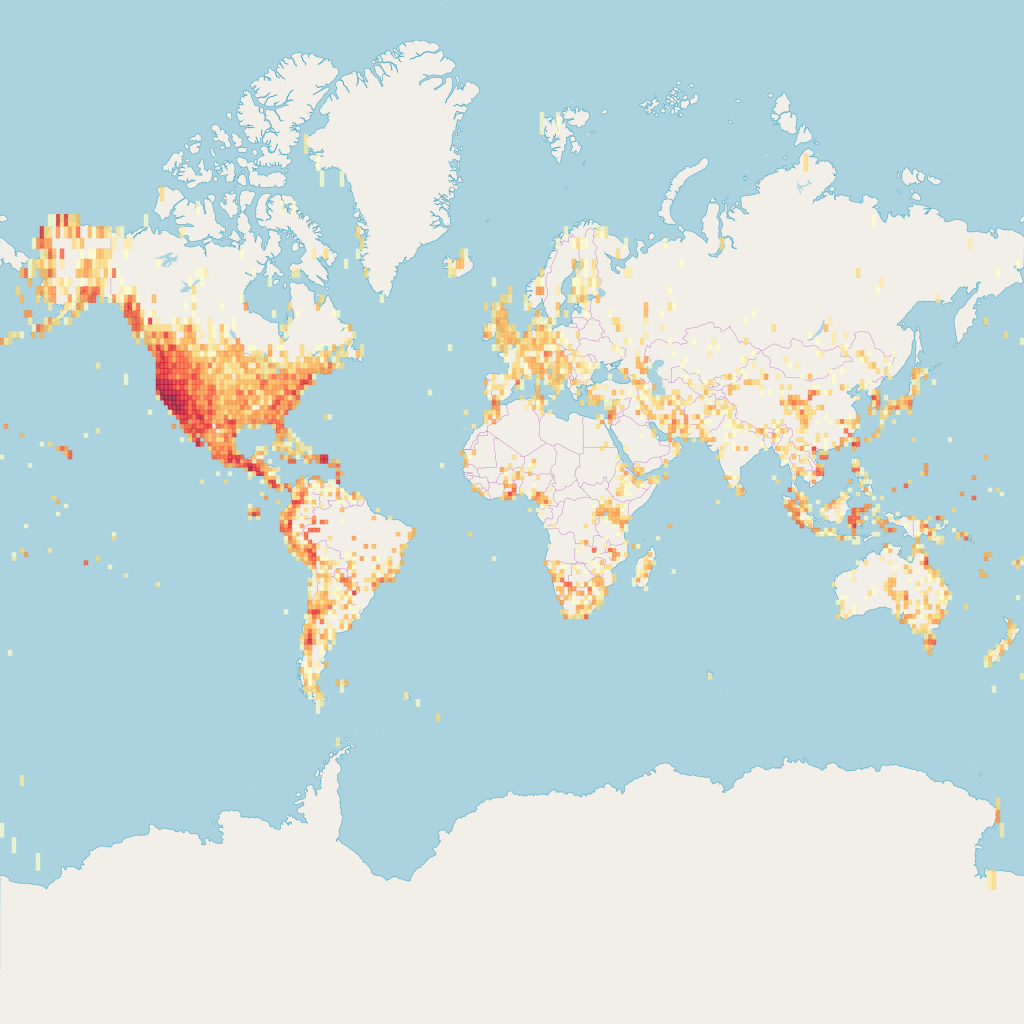

In [7]:
x = api_json.create_map(rq = {"institutioncode":"MVZ"})
x.save_map_image("mvz map", 2)
Image(filename = 'mvz map.png', width = 1000, height = 1000)

As we can see, most specimens in the MVZ come from California and the West broadly, but there are observations on every continent!

The API is somewhat limited in its functionality, in that you can't do too much with the maps once they're made. You can't look at the data as a dataframe, and you can't do any statistics on the data this way. We'll tackle doing that stuff in a later post. 